In [1]:
import csv
import os
import glob
import pandas as pd
from tqdm import tqdm

from PIL import Image
from io import BytesIO 

In [2]:
folder_path = '/home/studenti/ballerini/datasets/openface_ravdess_landmark'

In [3]:
file_paths = []
for f in glob.glob(folder_path+'/*.csv', recursive=True):
    file_paths.append(f)

In [4]:
one_csv = file_paths[0]

In [5]:
df = pd.read_csv(one_csv).iloc[:,-35:-18]
emotion = int(one_csv.split('/')[-1].split('-')[0])
record_id = one_csv.split('/')[-1].split('.')[0]
df['emotion'] = emotion
df['id'] = record_id
df = df.drop([0])

In [6]:
for file_path in tqdm(file_paths):
    temp_df = pd.read_csv(file_path).iloc[:,-35:-18]
    
    emotion = int(file_path.split('/')[-1].split('-')[0])
    temp_df['emotion'] = emotion
    
    record_id = file_path.split('/')[-1].split('.')[0]
    temp_df['id'] = record_id
    
    df = pd.concat([df, temp_df])

100%|█████████████████████████████████████████████████████████████████| 9867/9867 [02:31<00:00, 65.34it/s]


In [7]:
df

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,emotion,id
0,0.00,0.74,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.00,0.28,0.00,0.00,0.53,0.14,4,04-10-pn7664
0,0.48,0.00,1.19,0.66,1.17,1.59,1.79,2.51,0.72,1.90,1.00,0.34,1.93,0.00,3.74,0.86,0.00,7,07-04-pn7223
0,2.32,2.15,0.54,1.16,0.00,0.15,0.34,1.25,0.80,0.97,0.25,0.88,0.32,0.11,1.92,1.78,0.00,4,04-08-pn1901
0,0.00,0.00,0.35,0.00,2.28,1.55,0.42,2.34,3.11,1.60,0.18,0.00,1.54,0.00,4.58,0.92,0.47,3,03-06-pn9605
0,1.50,3.12,0.00,2.24,1.41,1.38,0.16,1.80,3.33,1.58,0.00,0.00,0.51,0.00,3.97,1.75,0.00,3,03-18-pn325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.30,1.78,0.00,0.35,0.98,1.72,1.27,2.05,1.40,0.99,0.56,0.00,1.30,0.00,4.31,1.25,3.03,5,05-08-pn570
0,0.17,0.00,0.53,0.02,0.74,1.40,0.22,0.00,0.44,0.79,0.00,0.00,0.25,0.02,1.63,0.21,0.00,5,05-09-pn2759
0,0.00,0.00,0.54,0.00,2.12,2.71,2.55,2.10,1.57,2.07,0.22,0.55,1.54,0.00,2.13,0.31,0.70,3,03-03-pn8670
0,0.55,0.00,3.51,0.29,2.00,3.49,2.17,2.52,1.11,1.78,0.25,1.02,0.96,0.00,2.23,1.49,0.98,7,07-01-pn5438


In [8]:
df.to_csv('./au-emo_2.csv', index=False)

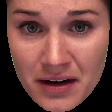

In [9]:
image_id = 2
path_to_image = folder_path +'/'+ df['id'].iloc[image_id] + '_aligned/face_det_000000.bmp'
image = Image.open(path_to_image)
image

In [10]:
print(df.iloc[image_id][:-2].tolist())

[2.32, 2.15, 0.54, 1.16, 0.0, 0.15, 0.34, 1.25, 0.8, 0.97, 0.25, 0.88, 0.32, 0.11, 1.92, 1.78, 0.0]
